# Bank Marketing Data Set 

## project overview

- Merupakan data kampanye untuk pemasaran yang digunakan oleh lembaga perbankan portugis. Kampanye dilakukan melalui panggilan telepon dan seingkali kontak ke klien diperlukan untuk mengetahui apakah produk yang dipasarkan seperti deposito berjangka akan dibeli oleh klien sehingga menjadi berlangganan atau tidak. 

- **4 jenis kumpulan data :**
1. bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]
2. bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.
3. bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan input yang lebih sedikit).
4. bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

- Kumpulan data terkecil digunakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis., SVM).

- Tujuan dilakukannya klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). 

- **Attribute Information:**

Input variables:
**bank client data:**
1. age (numeric)
2. job : jenis pekerjaan (kategoris: 'admin.','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','mahasiswa' ,'teknisi','menganggur','tidak diketahui')
3. marital : status perkawinan (kategori: 'cerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti cerai atau janda)
4. education (kategoris: 'dasar.4 tahun', 'dasar.6 tahun', 'dasar.9 tahun', 'sekolah menengah', 'buta huruf', 'kursus profesional', 'gelar universitas', 'tidak diketahui')
5. default: apakah kredit default? (kategoris: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki pinjaman perumahan? (kategoris: 'tidak', 'ya', 'tidak diketahui')
7. loan: memiliki pinjaman pribadi? (kategoris: 'tidak', 'ya', 'tidak diketahui')

**related with the last contact of the current campaign:**

8. contact: jenis komunikasi kontak (kategori: 'seluler', 'telepon')
9. month: kontak terakhir bulan dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','wed','kamis','fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**other attributes:**

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
18. cons.conf.idx:  indeks kepercayaan konsumen - indikator bulanan (numerik)
19. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
20. nr.employed:  jumlah karyawan - indikator triwulanan (numerik) 

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## import library

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## import data

In [56]:
df= pd.read_csv('Data/bank-full-1.csv',sep=';',engine='python', na_values="unknown")

In [57]:
# mengetahui beberapa data teratas
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [58]:
#mengetahui beberapa data terbawah
df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [59]:
# mengetahui banyaknya dimensi dataframe
df.shape

(45211, 17)

In [60]:
# mengetahui data yang terdulikat
df.duplicated().any()

False

In [61]:
# mengetahui data yang kosong
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [62]:
# presemtase data kosong
df.isna().sum() /len(df) *100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

- diketahui bahwa poutcome memiliki % data hilang yang  tinggi yang dapat mengganggu analisis maka perlu di drop dari dataset
- data job, education, contact, merupakan data yang tidak bisa diisi dengan mean, modus ataupun median, sehingga perlu dihapus dari dataset juga

In [63]:
# menghapus poutcome
df.drop(columns=["poutcome"], inplace=True)

In [64]:
#menghapus data kosong yang tersisa
df.dropna(inplace=True)

In [65]:
#mengecek kembali data yang kosong 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [66]:
df.shape #recheck

(30907, 16)

In [67]:
# mengetahui data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30907 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30907 non-null  int64 
 1   job        30907 non-null  object
 2   marital    30907 non-null  object
 3   education  30907 non-null  object
 4   default    30907 non-null  object
 5   balance    30907 non-null  int64 
 6   housing    30907 non-null  object
 7   loan       30907 non-null  object
 8   contact    30907 non-null  object
 9   day        30907 non-null  int64 
 10  month      30907 non-null  object
 11  duration   30907 non-null  int64 
 12  campaign   30907 non-null  int64 
 13  pdays      30907 non-null  int64 
 14  previous   30907 non-null  int64 
 15  y          30907 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [68]:
# informasi kolom
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [69]:
#konversi data ke bentuk kategorikal
categorical = ["job","marital","education", "default", "housing", "loan", "contact", "month","y"]

for col in categorical: 
    df[col] = df[col].astype("category")

In [70]:
# data yang unik dari setiap kolom
for col in df.columns:
    print(col,': ')
    print(set(df[col].unique()))
    print(" ")
    print("---------------------------------------------------------")

age : 
{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95}
 
---------------------------------------------------------
job : 
{'self-employed', 'technician', 'entrepreneur', 'housemaid', 'retired', 'management', 'admin.', 'unemployed', 'student', 'blue-collar', 'services'}
 
---------------------------------------------------------
marital : 
{'married', 'divorced', 'single'}
 
---------------------------------------------------------
education : 
{'primary', 'tertiary', 'secondary'}
 
---------------------------------------------------------
default : 
{'no', 'yes'}
 
---------------------------------------------------------
balance : 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,

## outlier

In [71]:
# statistik data sederhana
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000
mean,40.918918,1425.760701,15.967257,260.485003,2.751318,55.944835,0.808490
std,10.922583,3190.967030,8.226736,257.783963,2.954412,112.726930,2.706169
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,80.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,473.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1502.500000,21.000000,322.000000,3.000000,10.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,50.000000,871.000000,275.000000


Text(0.5, 1.0, '')

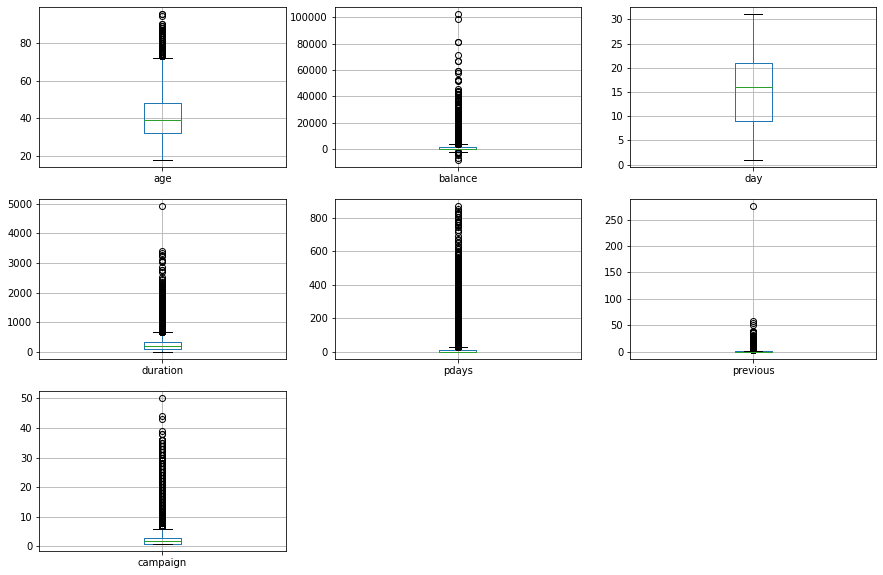

In [72]:
# mengecek outlier pada setiap data
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')

plt.subplot(3,3, 2)
fig = df.boxplot(column='balance')
fig.set_title('')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='day')
fig.set_title('')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='duration')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='pdays')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='previous')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='campaign')
fig.set_title('')

- diketahui bahwa kolom age, balance, duration, pdays, previous dan campaign memiliki outliers dengan jumlah yang sangat banyak

In [73]:
# menghapus data outlier
def remove_outlier(data):
    data = data.sort_values()
    Q1=data.quantile(0.3)
    Q3=data.quantile(0.7)
    
    iqr = Q3 - Q1
    
    IQR = Q3 - Q1
    upper = data > (Q3+1.5*IQR)
     # Below Lower bound
    lower = data < (Q1-1.5*IQR)
    return data.index[upper]

In [74]:
df.drop(remove_outlier(df['age']), inplace=True)
df.drop(remove_outlier(df['balance']), inplace=True)
df.drop(remove_outlier(df['duration']), inplace=True)
df.drop(remove_outlier(df['pdays']), inplace=True)
df.drop(remove_outlier(df['previous']), inplace=True)
df.drop(remove_outlier(df['campaign']), inplace=True)

Mengecek kembali apakah ada outlier

Text(0.5, 1.0, '')

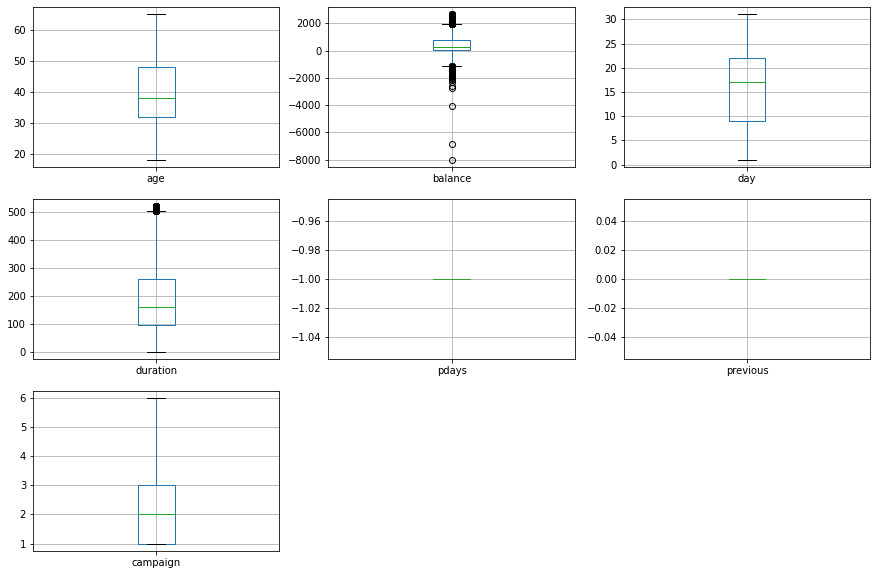

In [75]:
#recheck outlier
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')

plt.subplot(3,3, 2)
fig = df.boxplot(column='balance')
fig.set_title('')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='day')
fig.set_title('')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='duration')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='pdays')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='previous')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='campaign')
fig.set_title('')

## Visualisasi

In [78]:
#mengetahui beberapa data teratas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,no
12663,50,blue-collar,married,secondary,no,1329,yes,yes,telephone,4,jul,141,2,-1,0,no


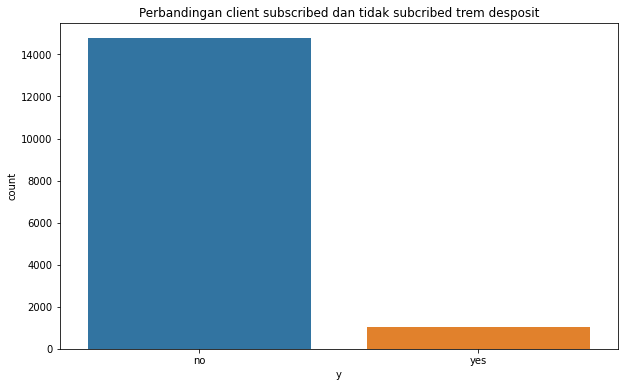

In [81]:
plt.figure(figsize=(10, 6))
 
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit')
sns.countplot(x ='y', data = df')

plt.show()

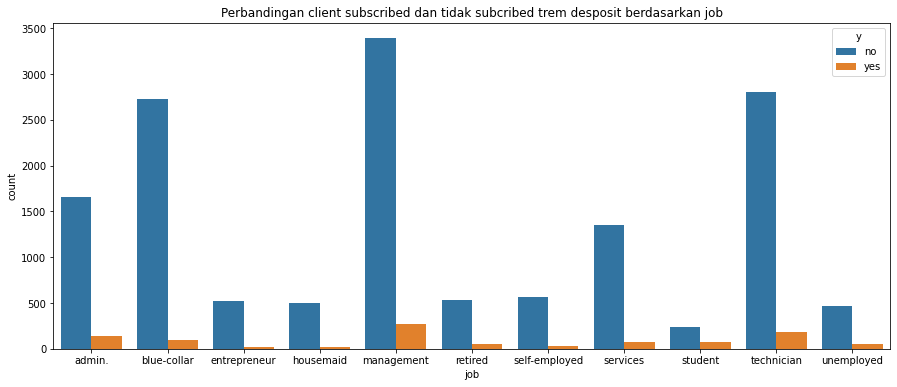

In [82]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan job')
ax = sns.countplot(x = df['job'], hue=df["y"])
plt.show()

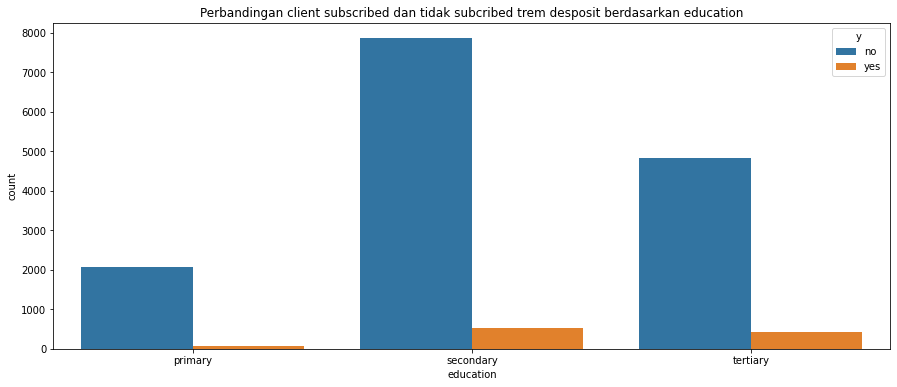

In [83]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan education')
ax = sns.countplot(x = df['education'], hue=df["y"])
plt.show()

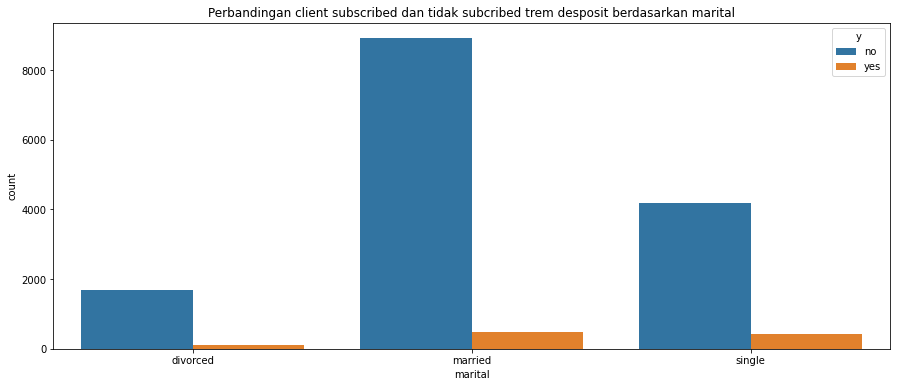

In [84]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan marital')
ax = sns.countplot(x = df['marital'], hue=df["y"])
plt.show()

- Diketahui bahwa lebih banya customer yang tidak berlangganan daripada yang berlangganan pada produk deposit 

## preprocessing data for classification model

## encoding

Data kategorikal yang sering digunakan adalah Ordinal dan Nominal. 

- Data nominal
    - Pada data Nominal dapat menggunakan One Hot Enconding. One Hot Encoding bisa dilakukan dengan 2 cara yaitu melalui Library Scikit-Learn atau dengan method Get Dummies dari pandas.
    - Data nominal  merupakan tipe data yang paling sederhana dimana nilai yang diberikan kepada item (record) hanya berupa label atau sekadar penamaan saja, tidak dapat diurut dan tidak dapat diukur. 
- Data Ordinal
    - Pada data Ordinal dapat ditreatment menggunakan method Replace dari Pandas atau menggunakan Sklearn Label Encoder.
    - Data ordinal merupakan data kategori yang dapat diurutkan dari yang paling rendah sampai yang paling tinggi,

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15801 entries, 12657 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        15801 non-null  int64   
 1   job        15801 non-null  category
 2   marital    15801 non-null  category
 3   education  15801 non-null  category
 4   default    15801 non-null  category
 5   balance    15801 non-null  int64   
 6   housing    15801 non-null  category
 7   loan       15801 non-null  category
 8   contact    15801 non-null  category
 9   day        15801 non-null  int64   
 10  month      15801 non-null  category
 11  duration   15801 non-null  int64   
 12  campaign   15801 non-null  int64   
 13  pdays      15801 non-null  int64   
 14  previous   15801 non-null  int64   
 15  y          15801 non-null  category
dtypes: category(9), int64(7)
memory usage: 1.1 MB


In [88]:
numc = list(df.select_dtypes(include=['int64']).columns.values)
catc = list(df.select_dtypes(include=['category']).columns.values)
print("numc :", numc)
print("catc : ", catc)

numc : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
catc :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [89]:
nom = ['job','marital','default','contact']
ord = ['education','housing','loan','month','y']

In [91]:
# Menerapkan **One-Hot Encoding** yaitu teknik yang merubah setiap nilai di dalam kolom menjadi kolom baru dan 
# mengisinya dengan nilai biner yaitu 0 dan 1. Menggunakan dummies values di Pandas dengan menggunakan fungsi get_dummies() 
df = pd.get_dummies(data=df,columns=['job','marital','default','contact'])

In [92]:
# Menerapkan **Label encoding** mengubah setiap nilai dalam kolom menjadi angka yang berurutan. 
# Dapat menggunakan Python Pandas untuk melakukan label encoding 
# menggunakan library sci-kit LabelEncoder dan lakukan proses fit_transform() dengan kolom yang ingin dirubah
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for ord_col in ord:
    df[ord_col] = encoder.fit_transform(df[ord_col])

In [93]:
df

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,contact_cellular,contact_telephone
12657,27,1,35,0,0,4,5,255,1,-1,...,0,0,0,0,0,1,1,0,1,0
12658,54,0,466,0,0,4,5,297,1,-1,...,0,0,0,0,1,0,1,0,1,0
12660,31,1,19,0,0,4,5,65,2,-1,...,0,1,0,0,0,1,1,0,0,1
12661,27,1,126,1,1,4,5,436,4,-1,...,0,1,0,0,0,1,1,0,1,0
12663,50,1,1329,1,1,4,5,141,2,-1,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,2,1428,0,0,16,9,333,2,-1,...,0,0,0,0,1,0,1,0,1,0
45202,34,1,557,0,0,17,9,224,1,-1,...,0,0,0,0,0,1,1,0,1,0
45203,23,2,113,0,0,17,9,266,1,-1,...,1,0,0,0,0,1,1,0,1,0
45205,25,1,505,0,1,17,9,386,2,-1,...,0,1,0,0,0,1,1,0,1,0


In [94]:
df.columns

Index(['age', 'education', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'contact_cellular', 'contact_telephone'],
      dtype='object')

## feature dan target

In [95]:
# Seperating Features and Target
## select feataures
features = df.drop('y', axis=1)
features

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,contact_cellular,contact_telephone
12657,27,1,35,0,0,4,5,255,1,-1,...,0,0,0,0,0,1,1,0,1,0
12658,54,0,466,0,0,4,5,297,1,-1,...,0,0,0,0,1,0,1,0,1,0
12660,31,1,19,0,0,4,5,65,2,-1,...,0,1,0,0,0,1,1,0,0,1
12661,27,1,126,1,1,4,5,436,4,-1,...,0,1,0,0,0,1,1,0,1,0
12663,50,1,1329,1,1,4,5,141,2,-1,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,2,1428,0,0,16,9,333,2,-1,...,0,0,0,0,1,0,1,0,1,0
45202,34,1,557,0,0,17,9,224,1,-1,...,0,0,0,0,0,1,1,0,1,0
45203,23,2,113,0,0,17,9,266,1,-1,...,1,0,0,0,0,1,1,0,1,0
45205,25,1,505,0,1,17,9,386,2,-1,...,0,1,0,0,0,1,1,0,1,0


In [96]:
# select target
target = df['y']
target

12657    0
12658    0
12660    0
12661    0
12663    0
        ..
45198    0
45202    1
45203    1
45205    1
45209    0
Name: y, Length: 15801, dtype: int64

## split data

In [97]:
# Split dataset into training set and test set

from sklearn.model_selection import train_test_split

## split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state= 1)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions X_test dataset : ", X_test.shape)
print(" ")
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset : ", y_test.shape)

Number transactions X_train dataset:  (11060, 29)
Number transactions X_test dataset :  (4741, 29)
 
Number transactions y_train dataset:  (11060,)
Number transactions y_test dataset :  (4741,)


## imbalance data

In [98]:
# menghandle imbalance data dengan SMOTE (Sintetis Minoritas Sampling Teknik)
df['y'].value_counts()

0    14772
1     1029
Name: y, dtype: int64

In [99]:
from collections import Counter
Counter(y_train)

Counter({0: 10335, 1: 725})

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)

In [101]:
Counter(y_train_smote)

Counter({0: 10335, 1: 10335})

## scaler

In [102]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # scaling X_train
X_train_smote = scaler.fit_transform(X_train_smote) # scaling over_X_train

X_test = scaler.transform(X_test)

## logitsic regression

In [103]:
# Logistic regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

pred1 = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.9352457287492091
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4437
           1       0.20      0.00      0.01       304

    accuracy                           0.94      4741
   macro avg       0.57      0.50      0.49      4741
weighted avg       0.89      0.94      0.90      4741



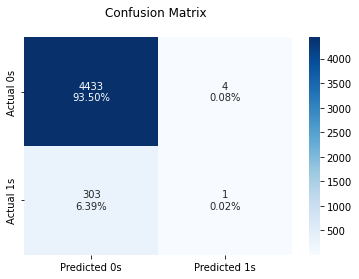

In [104]:
cm = confusion_matrix(y_test, pred1)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])


plt.show()

In [105]:
# Logistic Regression dengan SMOTE
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train_smote, y_train_smote)

pred11 = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred11))
print(classification_report(y_test, pred11))

Accuracy Score: 0.92723054207973
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4437
           1       0.34      0.14      0.20       304

    accuracy                           0.93      4741
   macro avg       0.64      0.56      0.58      4741
weighted avg       0.90      0.93      0.91      4741



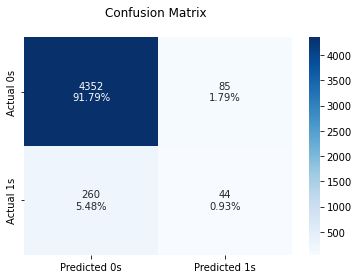

In [106]:
cm = confusion_matrix(y_test, pred11)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## decision tree

In [107]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

pred2 = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2 ))
print(classification_report(y_test, pred2 ))

Accuracy Score: 0.9213246150601139
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4437
           1       0.36      0.30      0.33       304

    accuracy                           0.92      4741
   macro avg       0.66      0.63      0.64      4741
weighted avg       0.91      0.92      0.92      4741



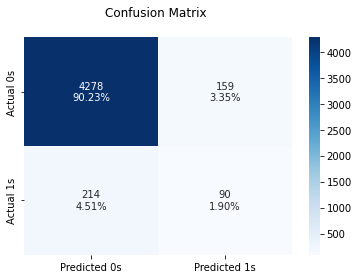

In [108]:
cm = confusion_matrix(y_test, pred2)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

In [109]:
# decision Tree Smote
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train_smote, y_train_smote)

pred22  = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred22 ))
print(classification_report(y_test, pred22 ))

Accuracy Score: 0.8890529424172116
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4437
           1       0.22      0.30      0.25       304

    accuracy                           0.89      4741
   macro avg       0.59      0.61      0.60      4741
weighted avg       0.90      0.89      0.90      4741



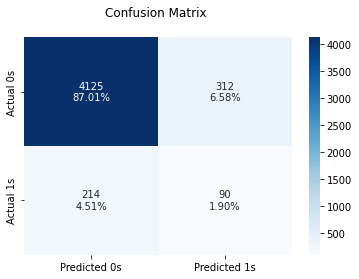

In [110]:
cm = confusion_matrix(y_test, pred22)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## random forest classifier

In [111]:
# random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred3  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred3  ))
print(classification_report(y_test, pred3  ))

Accuracy Score: 0.9373549883990719
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4437
           1       0.60      0.07      0.12       304

    accuracy                           0.94      4741
   macro avg       0.77      0.53      0.55      4741
weighted avg       0.92      0.94      0.91      4741



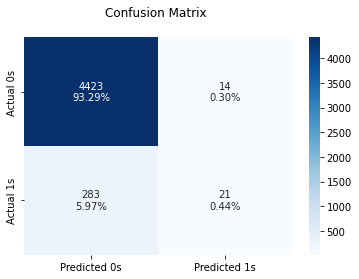

In [112]:
cm = confusion_matrix(y_test, pred3)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

In [113]:
# Random Forest Smote
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)

pred33   = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred33))
print(classification_report(y_test, pred33))

Accuracy Score: 0.9339801729592913
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4437
           1       0.46      0.17      0.25       304

    accuracy                           0.93      4741
   macro avg       0.70      0.58      0.61      4741
weighted avg       0.91      0.93      0.92      4741



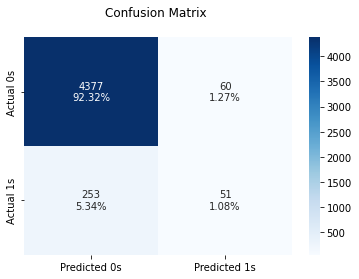

In [114]:
cm = confusion_matrix(y_test, pred33)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## naive bayes

In [115]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

pred4 = nb_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred4 ))
print(classification_report(y_test, pred4 ))

Accuracy Score   : 0.8475005273149124
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      4437
           1       0.17      0.35      0.23       304

    accuracy                           0.85      4741
   macro avg       0.56      0.62      0.57      4741
weighted avg       0.90      0.85      0.87      4741



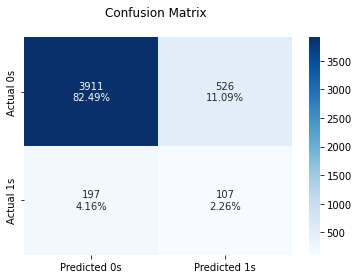

In [116]:
cm = confusion_matrix(y_test, pred4)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

In [119]:
# naive bayes smote
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

pred44  = nb_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred44))
print(classification_report(y_test, pred44))

Accuracy Score   : 0.7158827251634676
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4437
           1       0.08      0.35      0.13       304

    accuracy                           0.72      4741
   macro avg       0.51      0.54      0.48      4741
weighted avg       0.89      0.72      0.79      4741



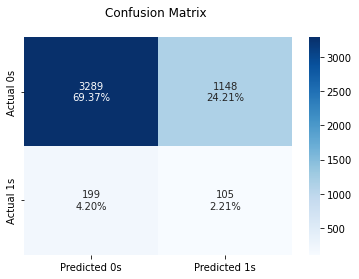

In [120]:
cm = confusion_matrix(y_test, pred44)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## knearest neighbors classifier

In [121]:
# knearest neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred5 = knn.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

Accuracy Score   : 0.9335583210293187
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4437
           1       0.31      0.03      0.05       304

    accuracy                           0.93      4741
   macro avg       0.62      0.51      0.51      4741
weighted avg       0.90      0.93      0.91      4741



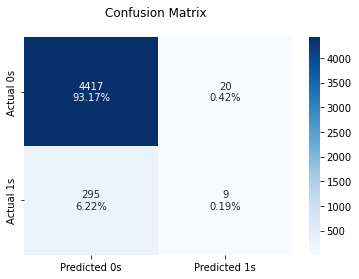

In [122]:
cm = confusion_matrix(y_test, pred5)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

In [123]:
# knearest neighbors Classifier smote
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

pred55 = knn.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred55))
print(classification_report(y_test, pred55))

Accuracy Score   : 0.9107783168107995
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4437
           1       0.21      0.14      0.17       304

    accuracy                           0.91      4741
   macro avg       0.58      0.55      0.56      4741
weighted avg       0.90      0.91      0.90      4741



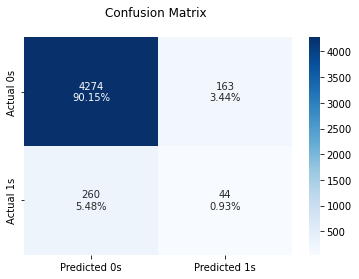

In [124]:
cm = confusion_matrix(y_test, pred55)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## support vector machine (SVM)

In [125]:
# Support Vector Machine (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

pred6 = svm_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred6))
print(classification_report(y_test, pred6))

Accuracy Score   : 0.9358785066441679
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4437
           1       0.00      0.00      0.00       304

    accuracy                           0.94      4741
   macro avg       0.47      0.50      0.48      4741
weighted avg       0.88      0.94      0.90      4741



/home/jefl5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jefl5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jefl5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


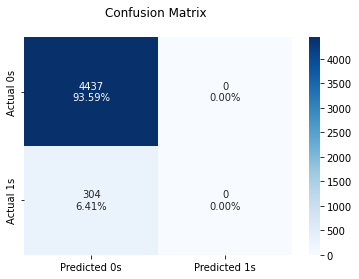

In [126]:
cm = confusion_matrix(y_test, pred6)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Support Vector Machine (SVM) Smote

In [127]:
#  Support Vector Machine (SVM) smote
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)

pred66 = svm_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred66))
print(classification_report(y_test, pred66))


Accuracy Score   : 0.9316599873444421
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4437
           1       0.35      0.08      0.12       304

    accuracy                           0.93      4741
   macro avg       0.64      0.53      0.54      4741
weighted avg       0.90      0.93      0.91      4741



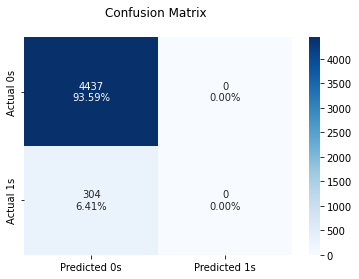

In [128]:
cmap = confusion_matrix(y_test, pred66)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

## Display the visualization of the Confusion Matrix.
plt.show()

## conclusion

In [129]:
print('Accuracy Score Model Algoritma')
print("Logistic Regression :", accuracy_score(y_test, pred1))
print("Decision Tree       :", accuracy_score(y_test, pred2))
print("Random Forest       :", accuracy_score(y_test, pred3))
print("Niabe Bayes         :", accuracy_score(y_test, pred4))
print("KNN                 :", accuracy_score(y_test, pred5))
print("SVM                 :", accuracy_score(y_test, pred6))



print('\nAccuracy Score Model Algoritma Setelah smooth')
print("Logistic Regression :", accuracy_score(y_test, pred11))
print("Decision Tree       :", accuracy_score(y_test, pred22))
print("Random Forest       :", accuracy_score(y_test, pred33))
print("Niabe Bayes         :", accuracy_score(y_test, pred44))
print("KNN                 :", accuracy_score(y_test, pred55))
print("SVM                 :", accuracy_score(y_test, pred66))

Accuracy Score Model Algoritma
Logistic Regression : 0.9352457287492091
Decision Tree       : 0.9213246150601139
Random Forest       : 0.9373549883990719
Niabe Bayes         : 0.8475005273149124
KNN                 : 0.9335583210293187
SVM                 : 0.9358785066441679

Accuracy Score Model Algoritma Setelah smooth
Logistic Regression : 0.92723054207973
Decision Tree       : 0.8890529424172116
Random Forest       : 0.9339801729592913
Niabe Bayes         : 0.7158827251634676
KNN                 : 0.9107783168107995
SVM                 : 0.9316599873444421


Dari hasil accuracy score diaatas terlihat bahwa Random Forest memiliki nilai paling tinggi diantara yang lain.